In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bioresponseframe = pd.read_csv("bioresponse.csv", header = 0, sep=",")

In [3]:
bioresponseframe

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# отбрасывать строки со значениями NaN
bioresponseframe = bioresponseframe.dropna()
bioresponseframe

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Внедрение кода 4 классификаторов. Для этого импортируем соответствующий модуль в библиотеку Scikit-learn
from sklearn import  datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve

In [6]:
# Разделите данные на обучающий и тестовый наборы

X_train, X_test, y_train, y_test = train_test_split(bioresponseframe.drop('Activity', axis=1), 
                                                    bioresponseframe['Activity'], test_size = 0.2, random_state = 1)


# Модель неглубокого дерева
Подготовка данных и расчет метрик

In [7]:
# создать дерево с глубокой кроной с profondeur=3 - неглубокое дерево решений = sdt
sdt = tree.DecisionTreeClassifier(max_depth=3)

# Обучение данных.
sdt.fit(X_train, y_train)
y_pred = sdt.predict(X_test)
predict_proba = sdt.predict_proba(X_test)

# расчет метрик нашей модели на тестовых данных

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
log_loss = metrics.log_loss(y_test, y_pred)

print("accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)
print("log-loss: ", log_loss)

accuracy:  0.758988015978695
Precision:  0.7714285714285715
Recall:  0.7921760391198044
F1-score:  0.781664656212304
log-loss:  8.324361236793784


Построим кривые "точность-вызов" и ROC для модели неглубокого дерева

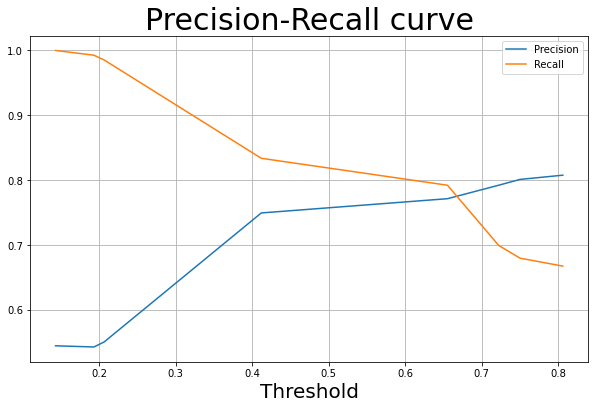

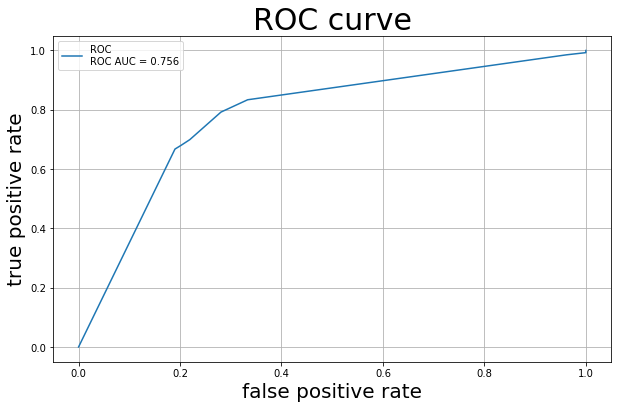

In [8]:
# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 20)
plt.title(u'Precision-Recall curve',fontsize = 30)
plt.legend(fontsize = 10)
plt.show()


# ROC-curve

fpr, tpr, thr = roc_curve(y_test, predict_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,3)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 20)
plt.ylabel("true positive rate",fontsize = 20)
plt.title(u"ROC curve",fontsize = 30)
plt.legend(fontsize = 10)
plt.show()

# Модель глубокого дерева
Обучение данных и расчет метрик

In [9]:
#создать глубокое дерево с глубиной=15, глубокое дерево решений = ddt

ddt = tree.DecisionTreeClassifier(max_depth=15)
ddt.fit(X_train, y_train)
y_pred = ddt.predict(X_test)
predict_proba = ddt.predict_proba(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
log_loss = metrics.log_loss(y_test, y_pred)


print("accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)
print("log-loss: ", log_loss)

accuracy:  0.7310252996005326
Precision:  0.7530562347188264
Recall:  0.7530562347188264
F1-score:  0.7530562347188264
log-loss:  9.29016456872491


Построим кривые precision-racall и ROC для модели глубокого дерева

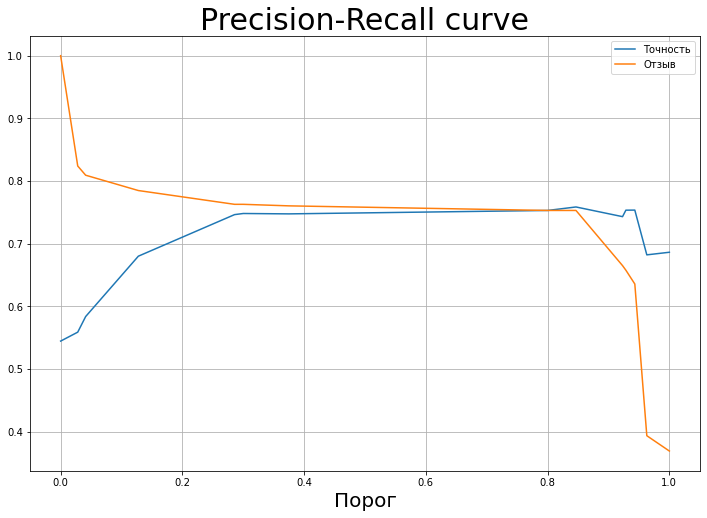

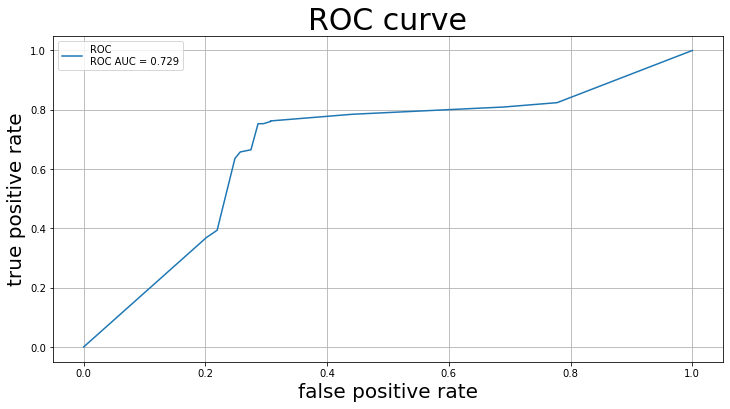

In [11]:
# presicion recall curve

precision, recall, thresholds = precision_recall_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(thresholds, precision[:-1], label="Точность")
plt.plot(thresholds, recall[:-1], label="Отзыв")
plt.xlabel(u"Порог",fontsize = 20)
plt.title(u'Precision-Recall curve',fontsize = 30)
plt.legend(fontsize = 10)
plt.show()

# ROC-curve

fpr, tpr, thr = roc_curve(y_test, predict_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize = (12,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,3)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 20)
plt.ylabel("true positive rate",fontsize = 20)
plt.title(u"ROC curve",fontsize = 30)
plt.legend(fontsize = 10)
plt.show()

# Модель неглубокого дерева случайного леса
Подготовка данных и расчет метрик

In [12]:
#Создайте лес из n_оценок = 100 деревьев, каждое с глубиной 2. 
n_estimators = 750
srf = RandomForestClassifier(n_estimators, max_depth = 3)
srf.fit(pd.DataFrame(X_train), pd.DataFrame(y_train).values.ravel())

y_pred = srf.predict(X_test)
predict_proba = srf.predict_proba(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
log_loss = metrics.log_loss(y_test, y_pred)

print("accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)
print("log-loss: ", log_loss)

accuracy:  0.7376830892143809
Precision:  0.7476635514018691
Recall:  0.78239608801956
F1-score:  0.7646356033452807
log-loss:  9.060220114939902


Построим кривые precision-racall и ROC для модели случайного неглубокого леса

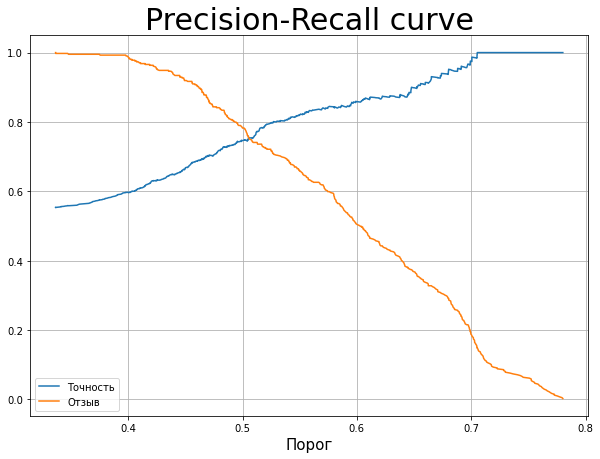

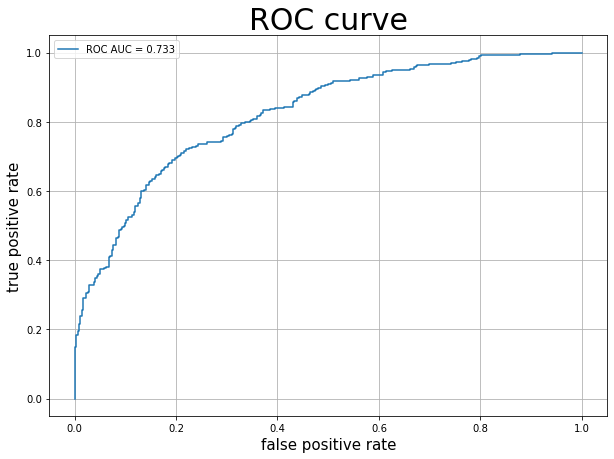

In [13]:
# presicion recall curve

precision, recall, thresholds = precision_recall_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(thresholds, precision[:-1], label="Точность")
plt.plot(thresholds, recall[:-1], label="Отзыв")
plt.xlabel(u"Порог",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 30)
plt.legend(fontsize = 10)
plt.show()

# ROC-curve

fpr, tpr, thr = roc_curve(y_test, predict_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize = (10,7))
plt.plot(fpr, tpr, label=u'ROC AUC = ' + str(round(roc_auc,3)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 30)
plt.legend(fontsize = 10)
plt.show()

# Глубокая модель случайного леса
Подготовка данных и расчет метрик

Создание случайного леса из глубоких деревьев

In [15]:
# создание леса деревьев, каждое из которых имеет глубину=15. 

n_estimators=750
drf = RandomForestClassifier(n_estimators, max_depth=15)
drf.fit(pd.DataFrame(X_train), pd.DataFrame(y_train).values.ravel())

y_pred = drf.predict(X_test)
predict_proba = drf.predict_proba(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
log_loss = metrics.log_loss(y_test, y_pred)

print("accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)
print("log-loss: ", log_loss)

accuracy:  0.8042609853528628
Precision:  0.8195121951219512
Recall:  0.8215158924205379
F1-score:  0.8205128205128204
log-loss:  6.7606648472193145


Построим кривые precision-racall и ROC для случайной модели глубокого леса

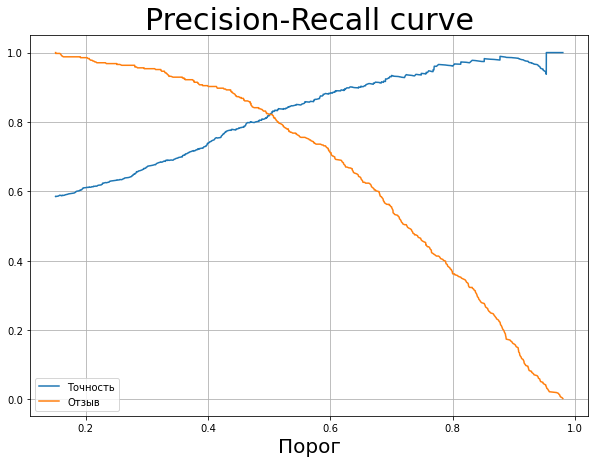

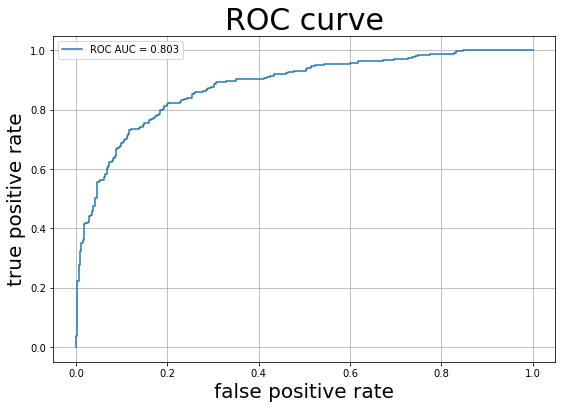

In [16]:
# presicion recall curve

precision, recall, thresholds = precision_recall_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(10, 7))
plt.grid()
plt.plot(thresholds, precision[:-1], label="Точность")
plt.plot(thresholds, recall[:-1], label="Отзыв")
plt.xlabel(u"Порог",fontsize = 20)
plt.title(u'Precision-Recall curve',fontsize = 30)
plt.legend(fontsize = 10)
plt.show()


# ROC-curve

fpr, tpr, thr = roc_curve(y_test, predict_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC AUC = ' + str(round(roc_auc,3)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 20)
plt.ylabel("true positive rate",fontsize = 20)
plt.title(u"ROC curve",fontsize = 30)
plt.legend(fontsize = 10)
plt.show()

# 5. Обучите классификатор, который избегает ошибок второго рода и рассчитайте для него метрики качества.

Мы видим, что более глубокий случайный лес работает лучше. 
Это объясняется тем, что случайный лес дает каждому дереву небольшой объем данных, 
Кроме того, случайный лес работает лучше, чем дерево решений, согласно метрике ROC-AUC. 
Чтобы получить лучшие результаты, мы также можем настроить такие параметры, как min_samples_leaf и min_samples_split.

In [20]:
# выбираем Random Forest с параметрами по умолчанию. Мы выбираем Random Forest с параметрами по умолчанию.

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Классификатор предсказывает вероятности для каждого элемента теста. Таким образом, если вероятность 
#принадлежности к классу 1 меньше 0,25, то это будет класс 0, иначе это будет 
# класс 1.

y_less = np.where(clf.predict_proba(X_test)[:,1] < 0.25, 0, 1)
y_less

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [22]:
#Расчет метрики для ошибки второго типа на классификаторе

accuracy = metrics.accuracy_score(y_test, y_less)
precision = metrics.precision_score(y_test, y_less)
recall = metrics.recall_score(y_test, y_less)
f1_score = metrics.f1_score(y_test, y_less)
log_loss = metrics.log_loss(y_test, y_less)
accuracy = metrics.accuracy_score(y_test, y_less)

print('accuracy', accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)
print("log-loss: ", log_loss)

accuracy 0.6844207723035952
Precision:  0.6387096774193548
Recall:  0.9682151589242054
F1-score:  0.7696793002915451
log-loss:  10.899958875390407


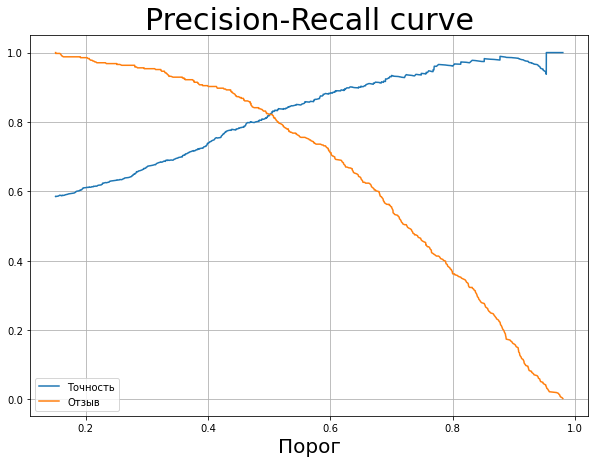

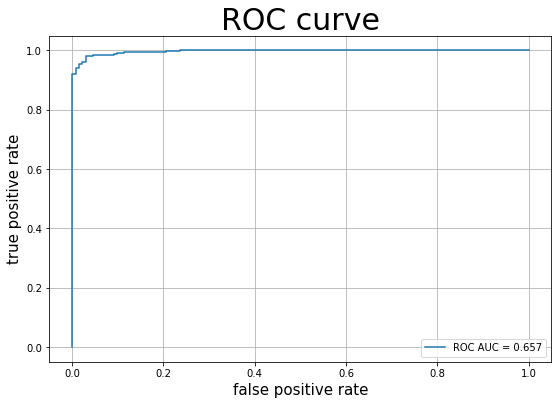

In [24]:
# presicion recall curve

precision, recall, thresholds = precision_recall_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(10, 7))
plt.grid()
plt.plot(thresholds, precision[:-1], label="Точность")
plt.plot(thresholds, recall[:-1], label="Отзыв")
plt.xlabel(u"Порог",fontsize = 20)
plt.title(u'Precision-Recall curve',fontsize = 30)
plt.legend(fontsize = 10)
plt.show()


# ROC-curve

fpr, tpr, thr = roc_curve(y_less, predict_proba[:,1])
roc_auc = roc_auc_score(y_test, y_less)
plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC AUC = ' + str(round(roc_auc,3)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 30)
plt.legend(fontsize = 10)
plt.show()